# Traffic Sign Classification

The followings are the structure for the traffic Sign classification Project.
1. Data loading, exploration and visualization
2. Preprocess the dataset for speeding up and improve of the classifier performance
3. Design, train and test a model architecture with tensorflow
4. Use the model to make predictions on new images
5. Softmax probabilities of the new images

## 1.Dataset summary, Exploration and visualization
We can load the dataset with pickle, and print out the statistical information about the dataset where the train, validation and test dataset are seperately available.

size of training set is (34799, 32, 32, 3)
examples of the validation set is 4410
examples of the testing set is 12630
The number of classes for traffic sign is 43.

In order to show more detailed information about the datasets' class distribution, we can visualize the three datasets as following:

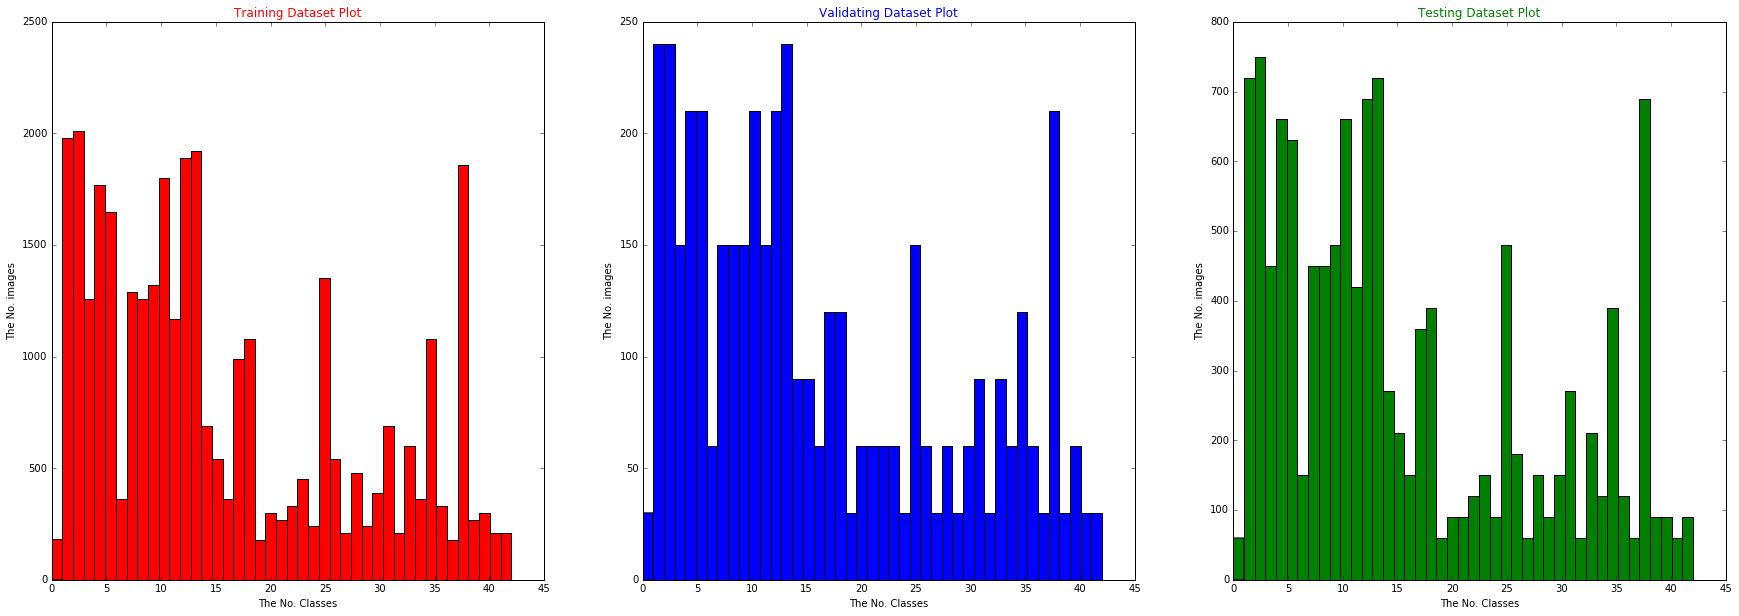

From the figure above we can see that more than half of the signs belong to the first 15 classes, we should take that into consideration if the performance of the classifier is not so good.

## 2.Preprocess the dataset
In order to speed up the training process and improve the performance for the traffic sign classifier, we need to do the pre-process for the datasets. Here I just use the two most common methods, colorspace change (from rgb color to gray) and normalization (with pixel = (pixel-128)/128). The following is a figure where the gray image, original image, and nornalized images are shown.

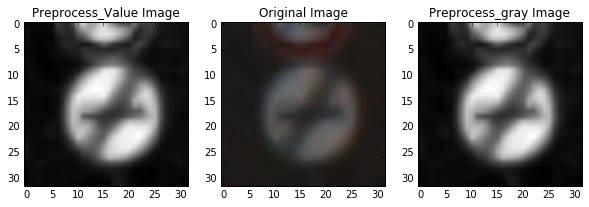


Also here I've tested the labels for the datasets, it shows me that the labels are orderly listed. Considering the randomness, we better shuffle the dataset before training in our Network.





## 3.Design, train and test a model architecture with tensorflow
Refer to the Lenet and Sermanet/Lecun model, my final model architecture are designed as following.
1. 5x5 concolution (input:32x32x1,output:28x28x6)
2. ReLU
3. 2x2 max pool (input:28x28x6,output:14x14x6)
4. 5x5 convolution(input:14x14x6,output:10x10x16)
5. ReLu
6. 2x2 max pool (input:10x10x16, output:5x5x16)
7. 5x5 convolution (input:5x5x16,output:1x1x400)
8. Relu
9. Flatten layers from number 8 (1x1x400 -> 400) and number 6 (5x5x16 -> 400) 
10. concatenate flattened layers to a single size-800 layer
11. Dropout layer (prob=0.5)
12. Fully connected layer(input: 800,output:43)
The graph for the architecture can be shown as below.
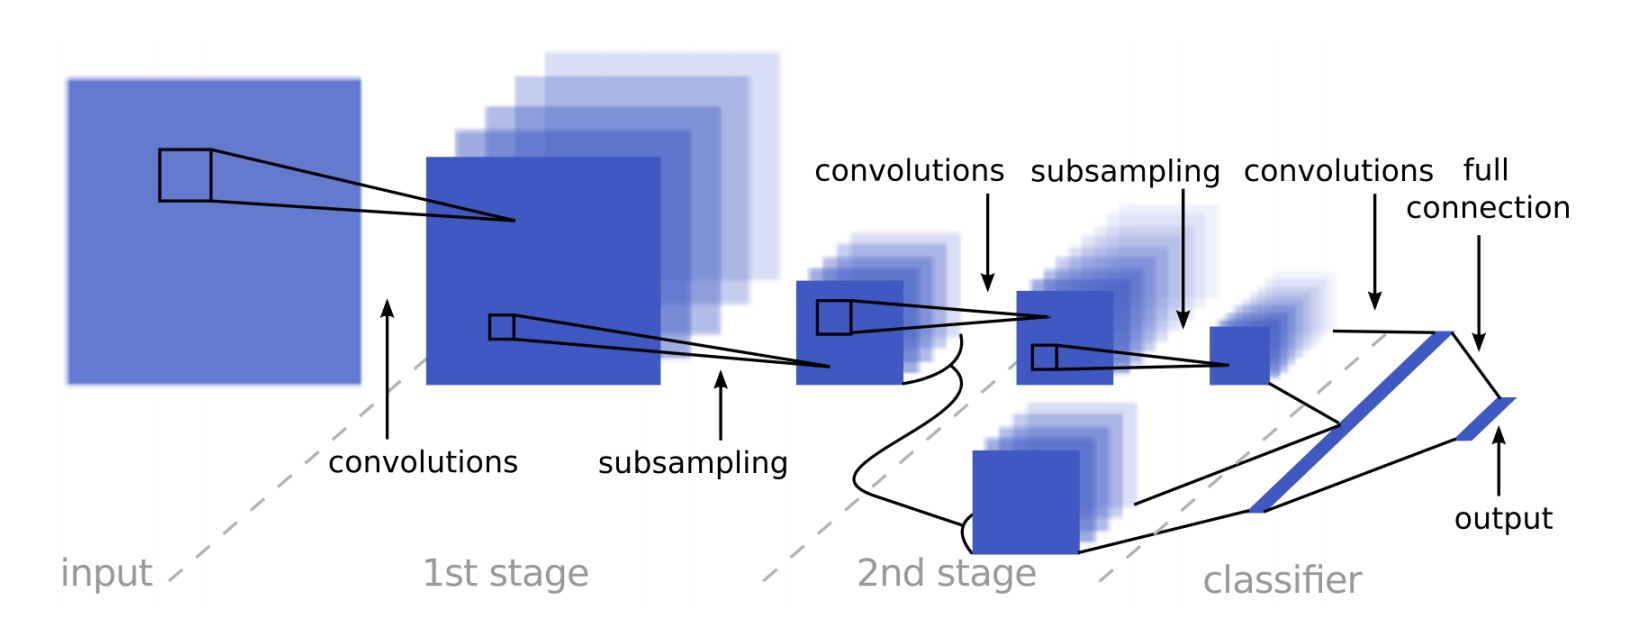


For training the model,I choose the hypeparameters as following:
1. batch size:100
2. epochs: 50
3. learning rate:0.0008
4. mu:0
5. sigma:0.1
6. dropout keep probability: 0.5
In order to use the CPU efficiently, I've also configured the tensorflow.session(), where just use four CPUs and 4 threads for the operator.

The accurancy results shows me the model is fine enough for our requst, actually the mu and sigma correct selection helps me improve the accuracy immediately. The following results are some trials I did for different preprocessed dataset. And finally, I chose to preprocess the original images with gray then going through the normalization function.
##### accuracy log
##### For the gray color space without the normalization 
'''
epoches: 1 Accuracy is 0.09886621305393795
epoches: 2 Accuracy is 0.20770974930316682
epoches: 3 Accuracy is 0.5106575929827971
epoches: 4 Accuracy is 0.7414965970175607
epoches: 5 Accuracy is 0.8104308402322047
epoches: 6 Accuracy is 0.846031748113178
epoches: 7 Accuracy is 0.8721088504845322
epoches: 8 Accuracy is 0.881179141349533
epoches: 9 Accuracy is 0.8963718868437267
epoches: 10 Accuracy is 0.903854876959405
epoches: 11 Accuracy is 0.8972789147813844
epoches: 12 Accuracy is 0.9115646276073932
epoches: 13 Accuracy is 0.92562358328004
epoches: 14 Accuracy is 0.9165532937666185
epoches: 15 Accuracy is 0.9147392270786692
epoches: 16 Accuracy is 0.9213151912840586
epoches: 17 Accuracy is 0.9181405877580449
epoches: 18 Accuracy is 0.9229024967639085
epoches: 19 Accuracy is 0.9229024960881188
epoches: 20 Accuracy is 0.917913836011
epoches: 21 Accuracy is 0.9126984079678854
epoches: 22 Accuracy is 0.9056689355378789
epoches: 23 Accuracy is 0.9213151953387964
epoches: 24 Accuracy is 0.9185941088226647
epoches: 25 Accuracy is 0.9238095260531454
epoches: 26 Accuracy is 0.8970521583038122
epoches: 27 Accuracy is 0.9303854895827451
epoches: 28 Accuracy is 0.9274376438858828
epoches: 29 Accuracy is 0.9256235839558297
epoches: 30 Accuracy is 0.927891160895765
epoches: 31 Accuracy is 0.9306122507908448
epoches: 32 Accuracy is 0.9226757382589673
epoches: 33 Accuracy is 0.9204081694285074
epoches: 34 Accuracy is 0.9224489851603432
epoches: 35 Accuracy is 0.92471655939712
epoches: 36 Accuracy is 0.9274376492921997
epoches: 37 Accuracy is 0.9351473938580813
epoches: 38 Accuracy is 0.9349206367047195
epoches: 39 Accuracy is 0.9278911595441857
epoches: 40 Accuracy is 0.9290249459867845
epoches: 41 Accuracy is 0.9229024967639085
epoches: 42 Accuracy is 0.9274376486164102
epoches: 43 Accuracy is 0.9414966022616882
epoches: 44 Accuracy is 0.9267573737773765
epoches: 45 Accuracy is 0.9385487579164051
epoches: 46 Accuracy is 0.9346938836060954
epoches: 47 Accuracy is 0.9074829961437216
epoches: 48 Accuracy is 0.9342403638930548
epoches: 49 Accuracy is 0.9369614537881346
epoches: 50 Accuracy is 0.9376417265997993
'''
##### gray images with normalization
'''
epoches: 1 Accuracy is 0.846485263771481
epoches: 2 Accuracy is 0.9072562396661494
epoches: 3 Accuracy is 0.9272108840293625
epoches: 4 Accuracy is 0.9292517051675152
epoches: 5 Accuracy is 0.9458049908787215
epoches: 6 Accuracy is 0.950793655010578
epoches: 7 Accuracy is 0.9575963763693293
epoches: 8 Accuracy is 0.9485260807738012
epoches: 9 Accuracy is 0.9616780078330007
epoches: 10 Accuracy is 0.9546485293208877
epoches: 11 Accuracy is 0.9668934277666399
epoches: 12 Accuracy is 0.9655328794401519
epoches: 13 Accuracy is 0.9630385480500132
epoches: 14 Accuracy is 0.9616780105361592
epoches: 15 Accuracy is 0.965759637945093
epoches: 16 Accuracy is 0.9662131549549752
epoches: 17 Accuracy is 0.9696145136069819
epoches: 18 Accuracy is 0.9689342462016342
epoches: 19 Accuracy is 0.9662131536033959
epoches: 20 Accuracy is 0.9714285748886143
epoches: 21 Accuracy is 0.9680272175881868
epoches: 22 Accuracy is 0.9732426348186675
epoches: 23 Accuracy is 0.968480729191752
epoches: 24 Accuracy is 0.9659863991531926
epoches: 25 Accuracy is 0.9802721119792013
epoches: 26 Accuracy is 0.9712018177352525
epoches: 27 Accuracy is 0.9727891151056268
epoches: 28 Accuracy is 0.9727891232151022
epoches: 29 Accuracy is 0.9702947891218051
epoches: 30 Accuracy is 0.9662131549549752
epoches: 31 Accuracy is 0.9666666692616989
epoches: 32 Accuracy is 0.9632653092581128
epoches: 33 Accuracy is 0.9671201849200017
epoches: 34 Accuracy is 0.9696145163101404
epoches: 35 Accuracy is 0.9757369662088061
epoches: 36 Accuracy is 0.9739229035755944
epoches: 37 Accuracy is 0.9743764232886352
epoches: 38 Accuracy is 0.9725623606554235
epoches: 39 Accuracy is 0.9634920664114747
epoches: 40 Accuracy is 0.9702947864186466
epoches: 41 Accuracy is 0.9709750592303114
epoches: 42 Accuracy is 0.9739229049271737
epoches: 43 Accuracy is 0.9739229049271737
epoches: 44 Accuracy is 0.9714285721854558
epoches: 45 Accuracy is 0.9741496593773771
epoches: 46 Accuracy is 0.9732426334670882
epoches: 47 Accuracy is 0.9668934250634814
epoches: 48 Accuracy is 0.9727891191603646
epoches: 49 Accuracy is 0.9802721133307805
epoches: 50 Accuracy is 0.9723356035020616
'''
##### Just the normalization
'''
epoches: 1 Accuracy is 0.33537414989301134
epoches: 2 Accuracy is 0.5755102038045589
epoches: 3 Accuracy is 0.6893424037632758
epoches: 4 Accuracy is 0.7326530568859204
epoches: 5 Accuracy is 0.7741496632564094
epoches: 6 Accuracy is 0.7891156519351362
epoches: 7 Accuracy is 0.796598639347656
epoches: 8 Accuracy is 0.8018140606328744
epoches: 9 Accuracy is 0.8045351457974267
epoches: 10 Accuracy is 0.8199546460797187
epoches: 11 Accuracy is 0.8278911562463324
epoches: 12 Accuracy is 0.8126984141310867
epoches: 13 Accuracy is 0.8192743790122657
epoches: 14 Accuracy is 0.8215419532490426
epoches: 15 Accuracy is 0.827891162328439
epoches: 16 Accuracy is 0.8106575977234614
epoches: 17 Accuracy is 0.8287981882387278
epoches: 18 Accuracy is 0.8421768697481307
epoches: 19 Accuracy is 0.8306122488445706
epoches: 20 Accuracy is 0.8276644024719186
epoches: 21 Accuracy is 0.8374149722306907
epoches: 22 Accuracy is 0.831746035962959
epoches: 23 Accuracy is 0.8401360546920845
epoches: 24 Accuracy is 0.8362811824091437
epoches: 25 Accuracy is 0.8433106636244153
epoches: 26 Accuracy is 0.8399092968629331
epoches: 27 Accuracy is 0.8464852590409536
epoches: 28 Accuracy is 0.8451247181481515
epoches: 29 Accuracy is 0.8371882116983808
epoches: 30 Accuracy is 0.8444444473638556
epoches: 31 Accuracy is 0.8362811790301956
epoches: 32 Accuracy is 0.8439909357602905
epoches: 33 Accuracy is 0.8414966030185725
epoches: 34 Accuracy is 0.8387755124477032
epoches: 35 Accuracy is 0.8476190481867109
epoches: 36 Accuracy is 0.8451247215270996
epoches: 37 Accuracy is 0.847619051565659
epoches: 38 Accuracy is 0.8451247161207827
epoches: 39 Accuracy is 0.8349206394889728
epoches: 40 Accuracy is 0.8462585099970673
epoches: 41 Accuracy is 0.8505668992898903
epoches: 42 Accuracy is 0.8478458073674416
epoches: 43 Accuracy is 0.8521541973360541
epoches: 44 Accuracy is 0.8464852617441121
epoches: 45 Accuracy is 0.8544217756275687
epoches: 46 Accuracy is 0.8594104336773187
epoches: 47 Accuracy is 0.8464852597167433
epoches: 48 Accuracy is 0.8487528326019408
epoches: 49 Accuracy is 0.8412698391073145
epoches: 50 Accuracy is 0.8473922890059802
'''

From the accuracy results, we can see the importance of preprocessing of the dataset, and also considering the model architechtue design, I refer to the Lecun net where there is a big difference from original LeNet, which is using the fallatened layers for the second and third ConvNet layers, then combine them together for a more dimensions output in that case more space information of the sign will be taken into consideration.

Here, I think in the future work I could include more preprocess methods for trials to check whether the performance will be a little bit better.

By the way, when I restore the model with tensorflow tool for the first time, there always be a error showing me that the name of (wx/Adam) is used already, but after a lot of runing of the retrive code including and excluding the tf.sess.run(tf.global_variables_init()) by comment out the error will be deminished. If you could give me some advice, appreciate that.

At the end, the accuracy for the validation set is about  0.9723356035020616 at the final epochs, we can get the maximum accuracy at 0.98. The accuracy of the test set is 0.9365.

## 4. Use model to predict the new images

The new German Traffic Sign images downloaded from website are shown as following:

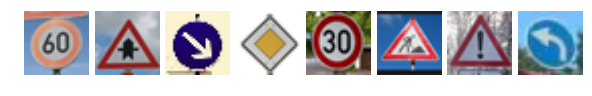

These eight new images' labels are listed as [3,11,38,12,1,25,18,34], going through the same preprocess procedure and pipeline, we can get the new image set accuracy is 100%. The accuracy is high perfectly due to the small size of dataset, when the size increases I believe that the acuracy will drop down in some extent.

## 5. Softmax probabilities of the new images

Based on the existing pipeline of the model, we add softmax opt in the end and use the tf.nn.top_k to get the top 5 probabilities for each of the new images. And the results can be shown as below.

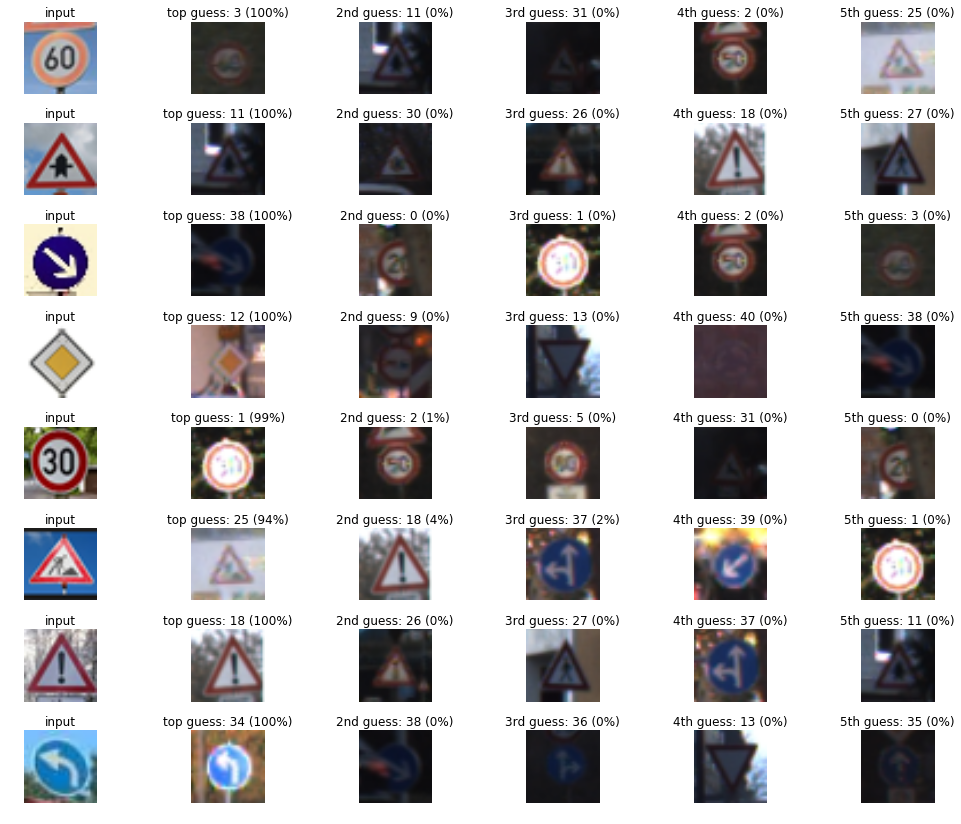

From the above figure, we can see the top five classes for each new input image based on their softmax probabilities.

Also, even the testing accuracy is 100%, but actually in the first trials of the testing, due to the blurriness of the figure 1 which will make it difficult to predict. Another big reason is the poor contrast with the backgound in figure 4, the color of the traffic light is almost the same with its backgroud. So, the poor constrast is also a big aspect for the difficulty in this classification task.




## Where can be improved

Even the designed traffic sign classifier is enough for our requst considering the accuracy for classification, but it is not strong enough or robust enough for the different light conditions, in the future we can fake more dataset with brightness changing method with the existing dataset to make it more compatible with different light conditions.

But most important thing is that by doing this project I learn a lot about how to preprocess the dataset for preparation, and design, initialize and modify the hyperparameters for the NN. Thanks Udacity SDC team for this help. 